In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.sample(5)

,Age,Fare,Family,Survived
265,36.0,10.50,0,0
162,26.0,NaN,0,0
510,29.0,7.75,0,1
314,43.0,26.25,2,0
56,21.0,10.50,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

## as there are 19% missing values in age..it is not suitable for performing meanMedian

In [7]:
X = df.drop(columns=['Survived'])
y= df['Survived']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [9]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [10]:
X_train.isnull().mean()

Age       0.192416
Fare      0.054775
Family    0.000000
dtype: float64

In [11]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [13]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] =X_train['Fare'].fillna(mean_fare)
X_train['Fare_median']= X_train['Fare'].fillna(median_fare)

/tmp/ipykernel_4572/556018512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
/tmp/ipykernel_4572/556018512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_median'] = X_train['Age'].fillna(median_age)
/tmp/ipykernel_4572/556018512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [17]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
236,44.0,26.000,1,44.0,44.0,26.000,26.000
20,35.0,26.000,0,35.0,35.0,26.000,26.000
142,24.0,15.850,1,24.0,24.0,15.850,15.850
441,20.0,9.500,0,20.0,20.0,9.500,9.500
675,18.0,7.775,0,18.0,18.0,7.775,7.775


In [18]:
print('Original Age variable variance ', X_train['Age'].var())
print('Age variance after mean imputation', X_train['Age_mean'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance  217.9219651416451
Age variance after mean imputation 175.93137551519598
Age Variance after median imputation:  176.35012738171375
Original Fare variable variance:  2236.8937485988718
Fare Variance after median imputation:  2129.5030393210445
Fare Variance after mean imputation:  2114.1949353845876


In [20]:
import matplotlib.pyplot as plt

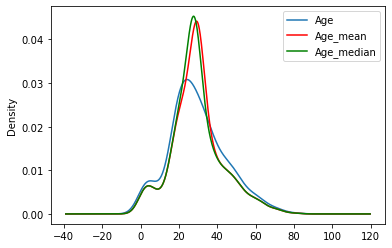

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original variable distribution
X_train['Age'].plot(kind = 'kde',ax=ax)

#variable imputed with mean
X_train['Age_mean'].plot(kind='kde',ax=ax,color='red')

#variable imputed with median
X_train['Age_median'].plot(kind='kde',ax=ax,color='green')

#add legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

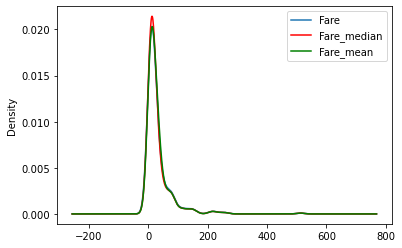

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [24]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,217.921965,87.867720,-6.991552,217.921965,217.921965,82.664302,82.672527
Fare,87.867720,2236.893749,15.218489,70.609091,74.166004,2236.893749,2236.893749
Family,-6.991552,15.218489,2.638978,-5.644375,-5.617327,14.383720,14.389049
Age_mean,217.921965,70.609091,-5.644375,175.931376,175.931376,66.736018,66.742659
Age_median,217.921965,74.166004,-5.617327,175.931376,176.350127,70.097827,70.005189
Fare_mean,82.664302,2236.893749,14.383720,66.736018,70.097827,2114.194935,2114.194935
Fare_median,82.672527,2236.893749,14.389049,66.742659,70.005189,2114.194935,2129.503039


In [25]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.117236,-0.320859,1.000000,1.000000,0.114485,0.113982
Fare,0.117236,1.000000,0.195807,0.112047,0.117551,1.000000,1.000000
Family,-0.320859,0.195807,1.000000,-0.261955,-0.260390,0.192567,0.191944
Age_mean,1.000000,0.112047,-0.261955,1.000000,0.998812,0.109425,0.109042
Age_median,1.000000,0.117551,-0.260390,0.998812,1.000000,0.114801,0.114236
Fare_mean,0.114485,1.000000,0.192567,0.109425,0.114801,1.000000,0.996399
Fare_median,0.113982,1.000000,0.191944,0.109042,0.114236,0.996399,1.000000


<AxesSubplot:>

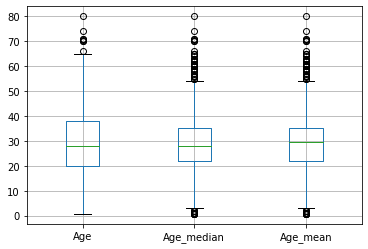

In [26]:
X_train[['Age','Age_median','Age_mean']].boxplot()

### more number of outliers

<AxesSubplot:>

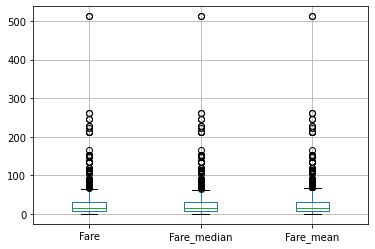

In [27]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

# using sklearn
### it is a better practice to use with sklearn as we can use it in pipelines

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

### we will use mean in fare column and median in age column

In [30]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Fare']),
    ('imputer2',imputer2,['Age'])
],remainder='passthrough')

In [31]:
trf.fit_transform(X_train)

array([[ 27.7208,  40.    ,   0.    ],
       [ 16.7   ,   4.    ,   2.    ],
       [  9.    ,  47.    ,   0.    ],
       ...,
       [ 49.5042,  71.    ,   0.    ],
       [221.7792,  28.75  ,   0.    ],
       [ 25.925 ,  28.75  ,   0.    ]])

In [34]:
trf.named_transformers_['imputer1'].statistics_

array([32.61759689])

In [35]:
X_train = trf.transform(X_train)
X_test = trf.fit(X_test)

In [36]:
X_train

array([[ 27.7208,  40.    ,   0.    ],
       [ 16.7   ,   4.    ,   2.    ],
       [  9.    ,  47.    ,   0.    ],
       ...,
       [ 49.5042,  71.    ,   0.    ],
       [221.7792,  28.75  ,   0.    ],
       [ 25.925 ,  28.75  ,   0.    ]])